# Simple Forecasting Model

Steps of forecasting
1. Choose a model that you will using for forecasting
2. Split data into train and test
3. Fit the training model and evaluate of test set
4. Refit the model of entire data set
5. Forecast into future

<Strong><a href="http://datagyani.in/index.php/2021/09/01/analyze-time-series-data/">HOW TO ANALYZE TIME SERIES DATA…</a></Strong>

We are using Holt-Winters method for forecasting 

In [1]:
#let's import all the neccessary libraries
import pandas as pd # data processing
import numpy as np # data processing
import os #helps changing directory and locating your file
from statsmodels.tsa.holtwinters import ExponentialSmoothing as ES #for forecasting
from sklearn.metrics import mean_squared_error #evaluation metric
import warnings
warnings.filterwarnings("ignore")

In [2]:
#changing directory
os.chdir('D:\\blog/Time Series')
os.getcwd()

'D:\\blog\\Time Series'

In [3]:
#reading the dataset
airline = pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
#dropping NA if any in the dataset
airline.dropna(inplace=True)
#printing the  the first five column
airline.head()

,Passengers(in thousands)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
#refer above codes smoothing technique codes if dont nknow why we are using MS
airline.index.freq = 'MS'
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Passengers(in thousands)  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


we have 144 entries in our dataset

In [6]:
#Train and test split
#making first 110 entries as training set and rest as test set
train = airline.iloc[:110] 
test = airline.iloc[110:]

Let's fit the model now and forecast rest 34 entries

In [7]:
model = ES(train['Passengers(in thousands)'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
model.summary()#this will provide details about your model

Dep. Variable:,endog,No. Observations:,110
Model:,ExponentialSmoothing,SSE,5330.852
Optimized:,True,AIC,458.886
Trend:,Multiplicative,BIC,502.094
Seasonal:,Multiplicative,AICC,466.403
Seasonal Periods:,12,Date:,"Thu, 05 Nov 2020"
Box-Cox:,False,Time:,01:23:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7811353,alpha,True
smoothing_slope,1.3707e-32,beta,True


In [8]:
predictions = model.forecast(34).rename('Forecast')
predictions

1958-03-01    374.630599
1958-04-01    366.037238
1958-05-01    368.965751
1958-06-01    425.074492
1958-07-01    472.879503
1958-08-01    469.317903
1958-09-01    413.781148
1958-10-01    361.137530
1958-11-01    317.242711
1958-12-01    359.010534
1959-01-01    367.140087
1959-02-01    356.334043
1959-03-01    416.009557
1959-04-01    406.467036
1959-05-01    409.719011
1959-06-01    472.025114
1959-07-01    525.110317
1959-08-01    521.155328
1959-09-01    459.484390
1959-10-01    401.026142
1959-11-01    352.283023
1959-12-01    398.664213
1960-01-01    407.691698
1960-02-01    395.692097
1960-03-01    461.958932
1960-04-01    451.362414
1960-05-01    454.973579
1960-06-01    524.161558
1960-07-01    583.110165
1960-08-01    578.718337
1960-09-01    510.235677
1960-10-01    445.320558
1960-11-01    391.193631
1960-12-01    442.697749
Freq: MS, Name: Forecast, dtype: float64

Let's visualize and see how did we fare

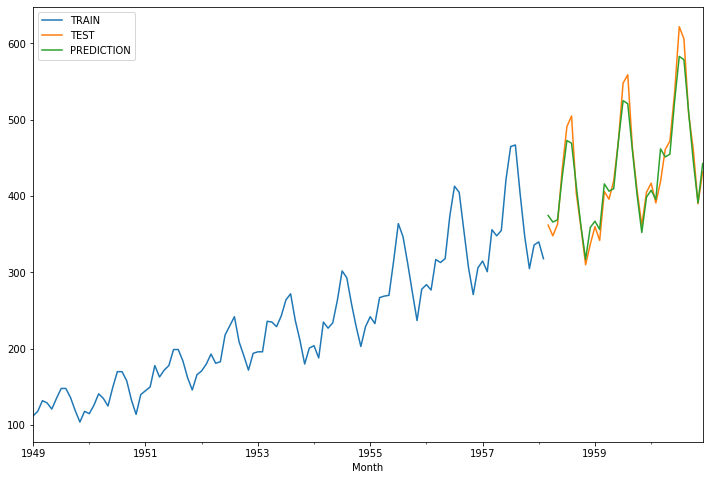

In [9]:
train['Passengers(in thousands)'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['Passengers(in thousands)'].plot(legend=True,label='TEST')
predictions.plot(legend=True,label='PREDICTION');

Looks good but let's check it using an evaluation metric

In [10]:
MSE= mean_squared_error(test,predictions)
MSE

313.1225583845097

In [11]:
RMSE= np.sqrt(mean_squared_error(test,predictions))
RMSE

17.695269378692988

These are good scores. Let's perform the last step and forecast into future

In [12]:
final_model = ES(airline['Passengers(in thousands)'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
final_model.summary()

Dep. Variable:,endog,No. Observations:,144
Model:,ExponentialSmoothing,SSE,15805.300
Optimized:,True,AIC,708.553
Trend:,Multiplicative,BIC,756.070
Seasonal:,Multiplicative,AICC,714.025
Seasonal Periods:,12,Date:,"Thu, 05 Nov 2020"
Box-Cox:,False,Time:,01:23:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2917104,alpha,True
smoothing_slope,7.7169e-18,beta,True


You would have observed that our final model has 144 observation. It is because we are forecasting on the complete airline dataset

In [13]:
final_predictions = final_model.forecast(30) #forecasting 30 months in future

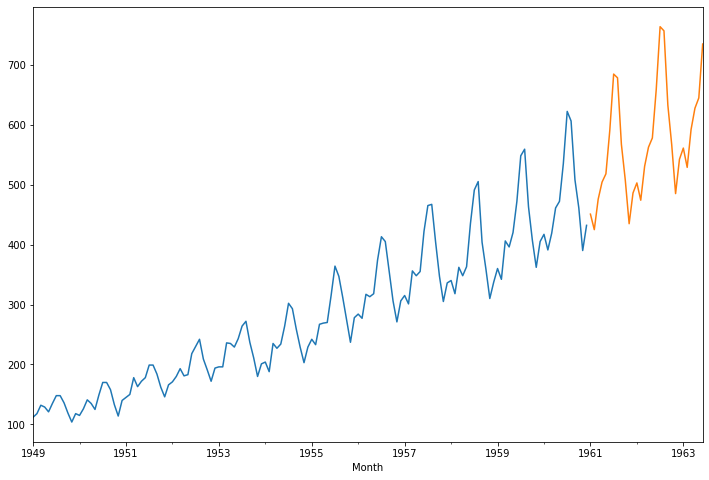

In [14]:
airline['Passengers(in thousands)'].plot(figsize=(12,8))
final_predictions.plot();